# ***`Project: Bankruptcy Prevention`***

**Business Objective:**

This is a classification project, since the variable to predict is binary (bankruptcy or non-
bankruptcy). The goal here is to model the probability that a business goes bankrupt
from different features.

The data file contains 7 features about 250 companies

The data set includes the following variables:

1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high
competitiveness.
6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7. class: bankruptcy, non-bankruptcy (target variable).

**Acceptance Criterion:**

Need to deploy the end results using Flask /Streamlit.etc.

# Exploratory Data Analysis (EDA)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

### Loading file

In [3]:
# Load the data as a single column
file_path = 'bankruptcy-prevention.xlsx'
df = pd.read_excel(file_path, header=None)

### First Few columns

In [4]:
df.head()

,0
0,industrial_risk; management_risk; financial_fl...
1,0.5;1;0;0;0;0.5;bankruptcy
2,0;1;0;0;0;1;bankruptcy
3,1;0;0;0;0;1;bankruptcy
4,0.5;0;0;0.5;0;1;bankruptcy


### Rearranging the data in correct format

In [5]:
# Split the single column into multiple columns based on the semicolon delimiter
df = df[0].str.split(';', expand=True)

### As i choosen Header as None, Assigning the column names

In [6]:
# Assign column names
df.columns = [
    'industrial_risk', 'management_risk', 'financial_flexibility',
    'credibility', 'competitiveness', 'operating_risk', 'class'
]

### Removing the existing headings and converting data types

In [7]:
# Remove the header row if it exists within the data
if df.iloc[0].str.contains('industrial_risk').any():
    df = df.drop(0).reset_index(drop=True)

# Convert the data types
for col in df.columns[:-1]:  # Exclude the 'class' column
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [9]:
df.shape

(250, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


### Check for Null value

In [11]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

### Check for Duplicate value

In [12]:
duplicate_count = df.duplicated().sum()

if duplicate_count > 0:
  print(f"There are {duplicate_count} duplicate rows in the dataset.")
else:
  print("There are no duplicate rows in the dataset.")

There are 147 duplicate rows in the dataset.


In [13]:
# DataFrames with and without duplicates
df_with_duplicates = df.copy()
df_without_duplicates = df.drop_duplicates()

# Verify the shapes
print(f"Shape with duplicates: {df_with_duplicates.shape}")
print(f"Shape without duplicates: {df_without_duplicates.shape}")

Shape with duplicates: (250, 7)
Shape without duplicates: (103, 7)


In [14]:
# Descriptive statistics
print("Descriptive Statistics with Duplicates:")
display(df_with_duplicates.describe())

Descriptive Statistics with Duplicates:


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
print("Descriptive Statistics without Duplicates:")
display(df_without_duplicates.describe())

Descriptive Statistics without Duplicates:


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.485437,0.563107,0.504854,0.582524,0.640777,0.514563
std,0.404971,0.412308,0.405206,0.377668,0.410747,0.439788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations:**

**Descriptive Statistics:**

With duplicates, the descriptive statistics show a mean and standard deviation that might be skewed by repeated values.

Without duplicates, the statistics provide a clearer picture of the diversity within our data.

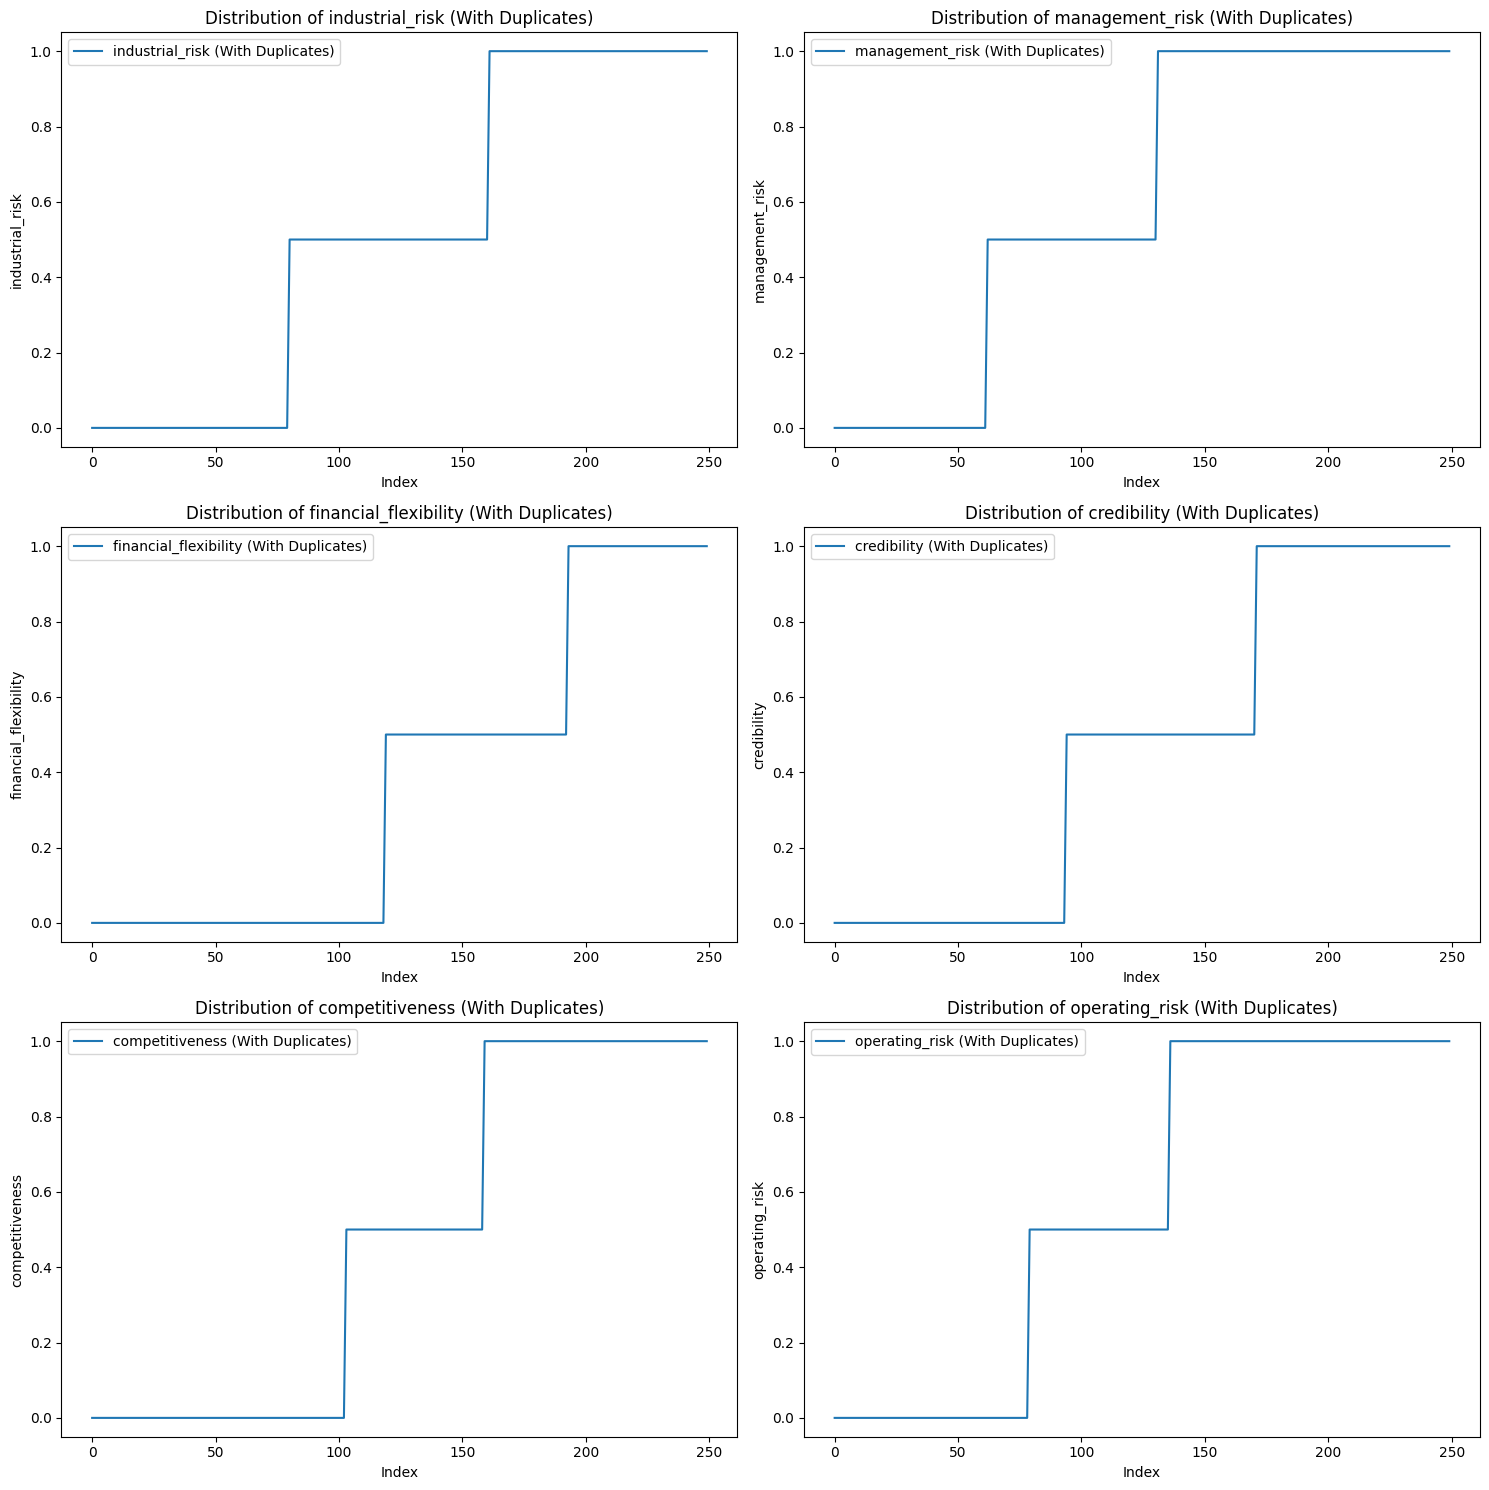

In [16]:
# Select numerical features
numerical_features = df_with_duplicates.select_dtypes(include=['float64']).columns

# Calculate the number of required subplots
n_features = len(numerical_features)

# Determine the number of rows and columns
ncols = 2
nrows = int(np.ceil(n_features / ncols))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    ax.plot(sorted(df_with_duplicates[feature]), label=f'{feature} (With Duplicates)')
    ax.set_title(f'Distribution of {feature} (With Duplicates)')
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)
    ax.legend()

# Remove any empty subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

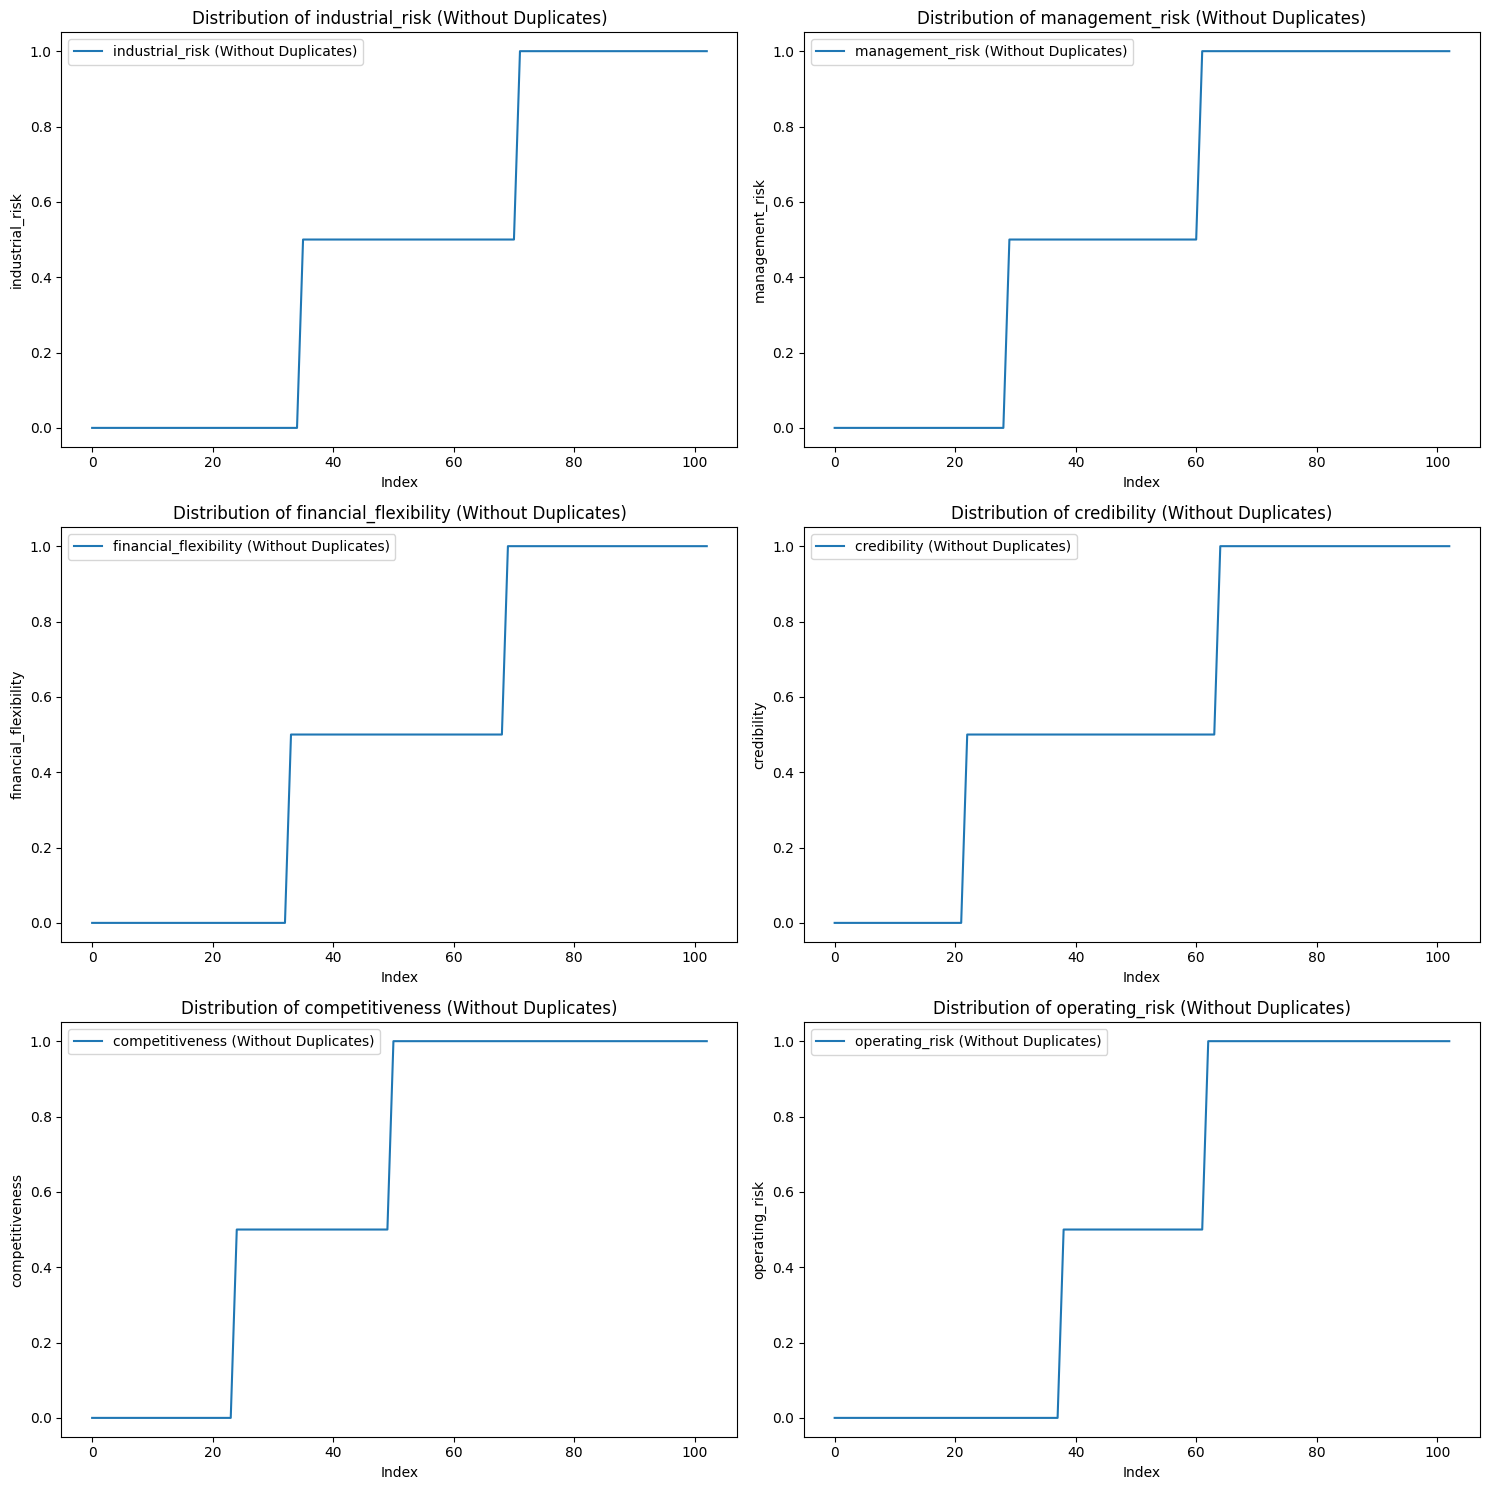

In [17]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64']).columns

# Calculate the number of required subplots
n_features = len(numerical_features)

# Determine the number of rows and columns
ncols = 2
nrows = int(np.ceil(n_features / ncols))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    ax.plot(sorted(df_without_duplicates[feature]), label=f'{feature} (Without Duplicates)')
    ax.set_title(f'Distribution of {feature} (Without Duplicates)')
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)
    ax.legend()

# Remove any empty subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:**

**Distribution Plots:**

The plots with duplicates appear to have more pronounced step changes, indicating multiple identical entries.

The plots without duplicates present a smoother distribution, which might reflect a more realistic view of the data.

### Dropping Duplicates

In [18]:
df.drop_duplicates(inplace=True)

### Statistical Summary

In [19]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.485437,0.563107,0.504854,0.582524,0.640777,0.514563
std,0.404971,0.412308,0.405206,0.377668,0.410747,0.439788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualize distributions of numerical features

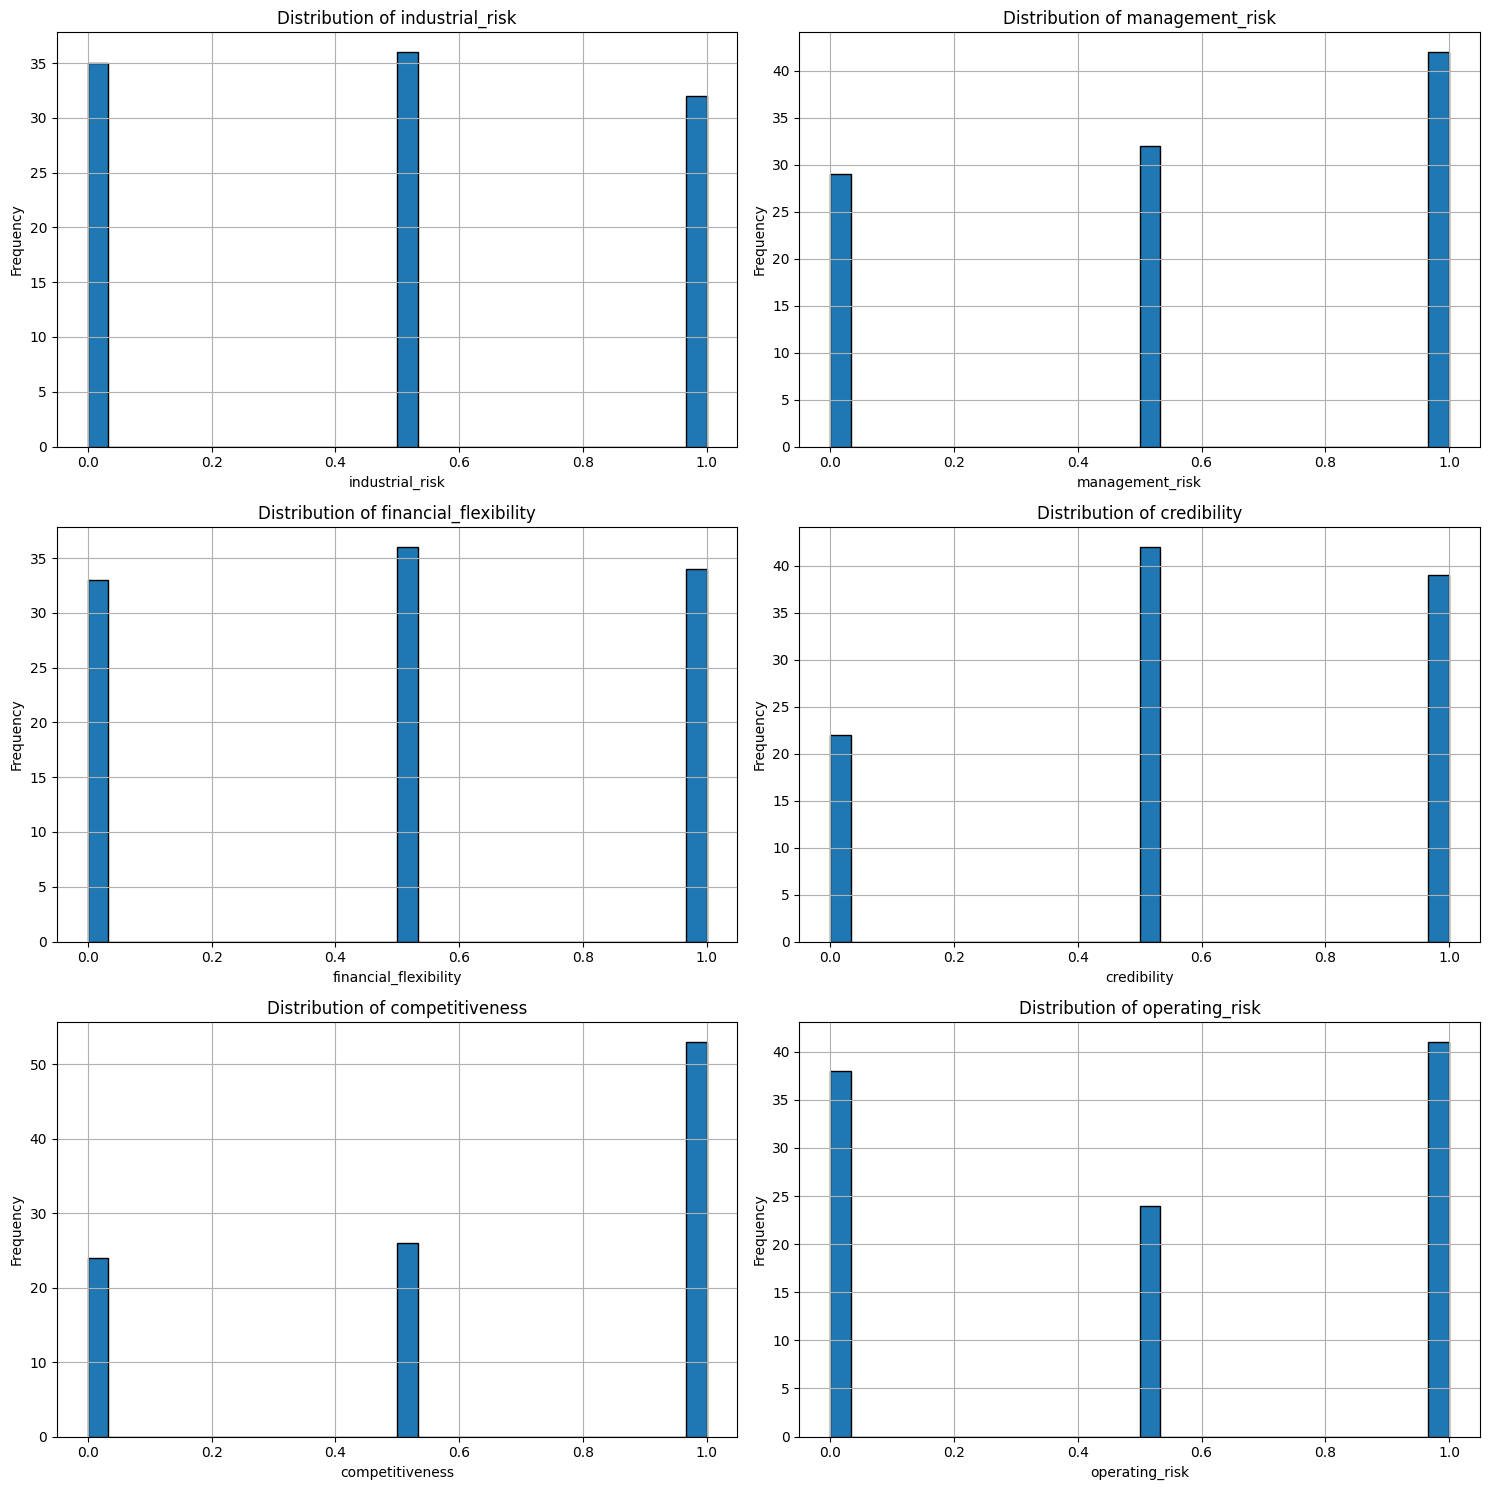

In [20]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64']).columns

# Calculate the number of required subplots
n_features = len(numerical_features)

# Determine the number of rows and columns
ncols = 2
nrows = int(np.ceil(n_features / ncols))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical feature
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    ax.hist(df[feature], bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any empty subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

**Observations:**

1. The variables tend to be distributed at three main points: low (0.0), medium (0.5), and high (1.0).

2. Extreme values (0.0 and 1.0) are more frequent, indicating polarized risk levels and attributes among firms.

3. Understanding the impact of these risk factors on bankruptcy prediction is crucial for further analysis.

### Visualize distributions of categorical features

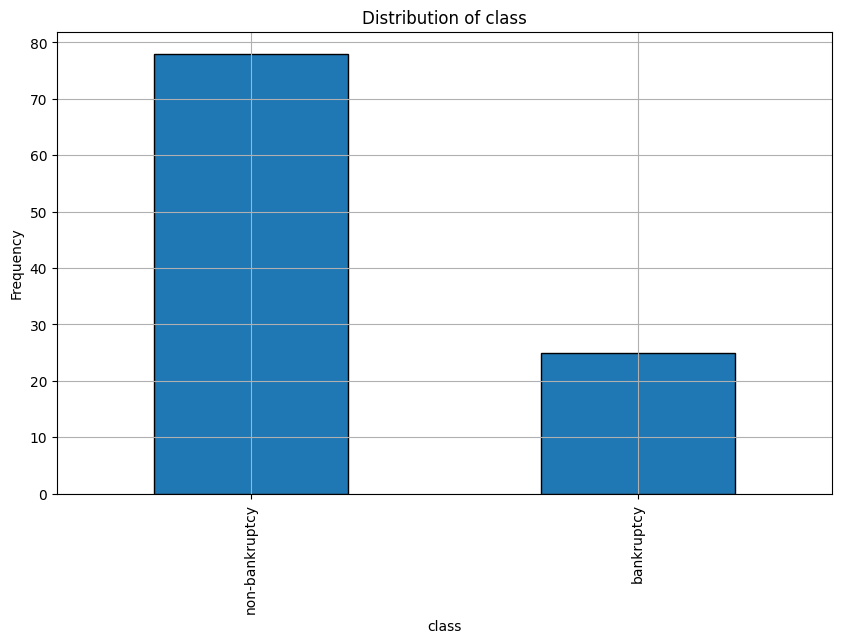

In [21]:
categorical_features = df.select_dtypes(include=['object']).columns

# Visualize distributions of categorical features using bar plots
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Data is imbalanced such that in future instance SMOTE method can be used to balance the 'Class' feature

### Explore correlations between numerical features

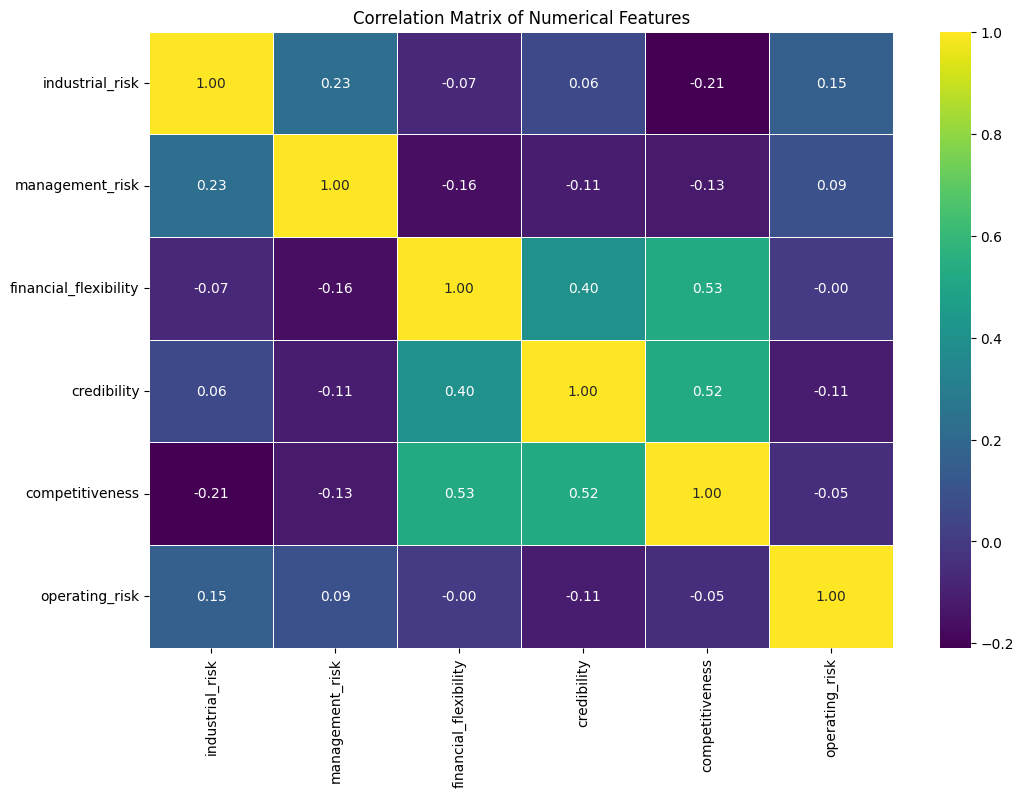

In [22]:
numerical_df = df[numerical_features]  # Filter only numerical columns
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Observations:**

1. Financial flexibility and competitiveness are highly correlated (0.53), indicating that firms with high financial flexibility tend to be more competitive.

2. Credibility also shows a strong relationship with both financial flexibility (0.40) and competitiveness (0.52), suggesting that credible firms are more flexible and competitive.

3. Industrial risk and competitiveness have a noticeable negative correlation (-0.21), implying that higher industrial risk is associated with lower competitiveness.

4. Most of the other correlations are weak, suggesting that the variables are relatively independent of each other in their contributions to the overall risk profile.

### Analyze categorical feature distributions and their relationships with numerical features

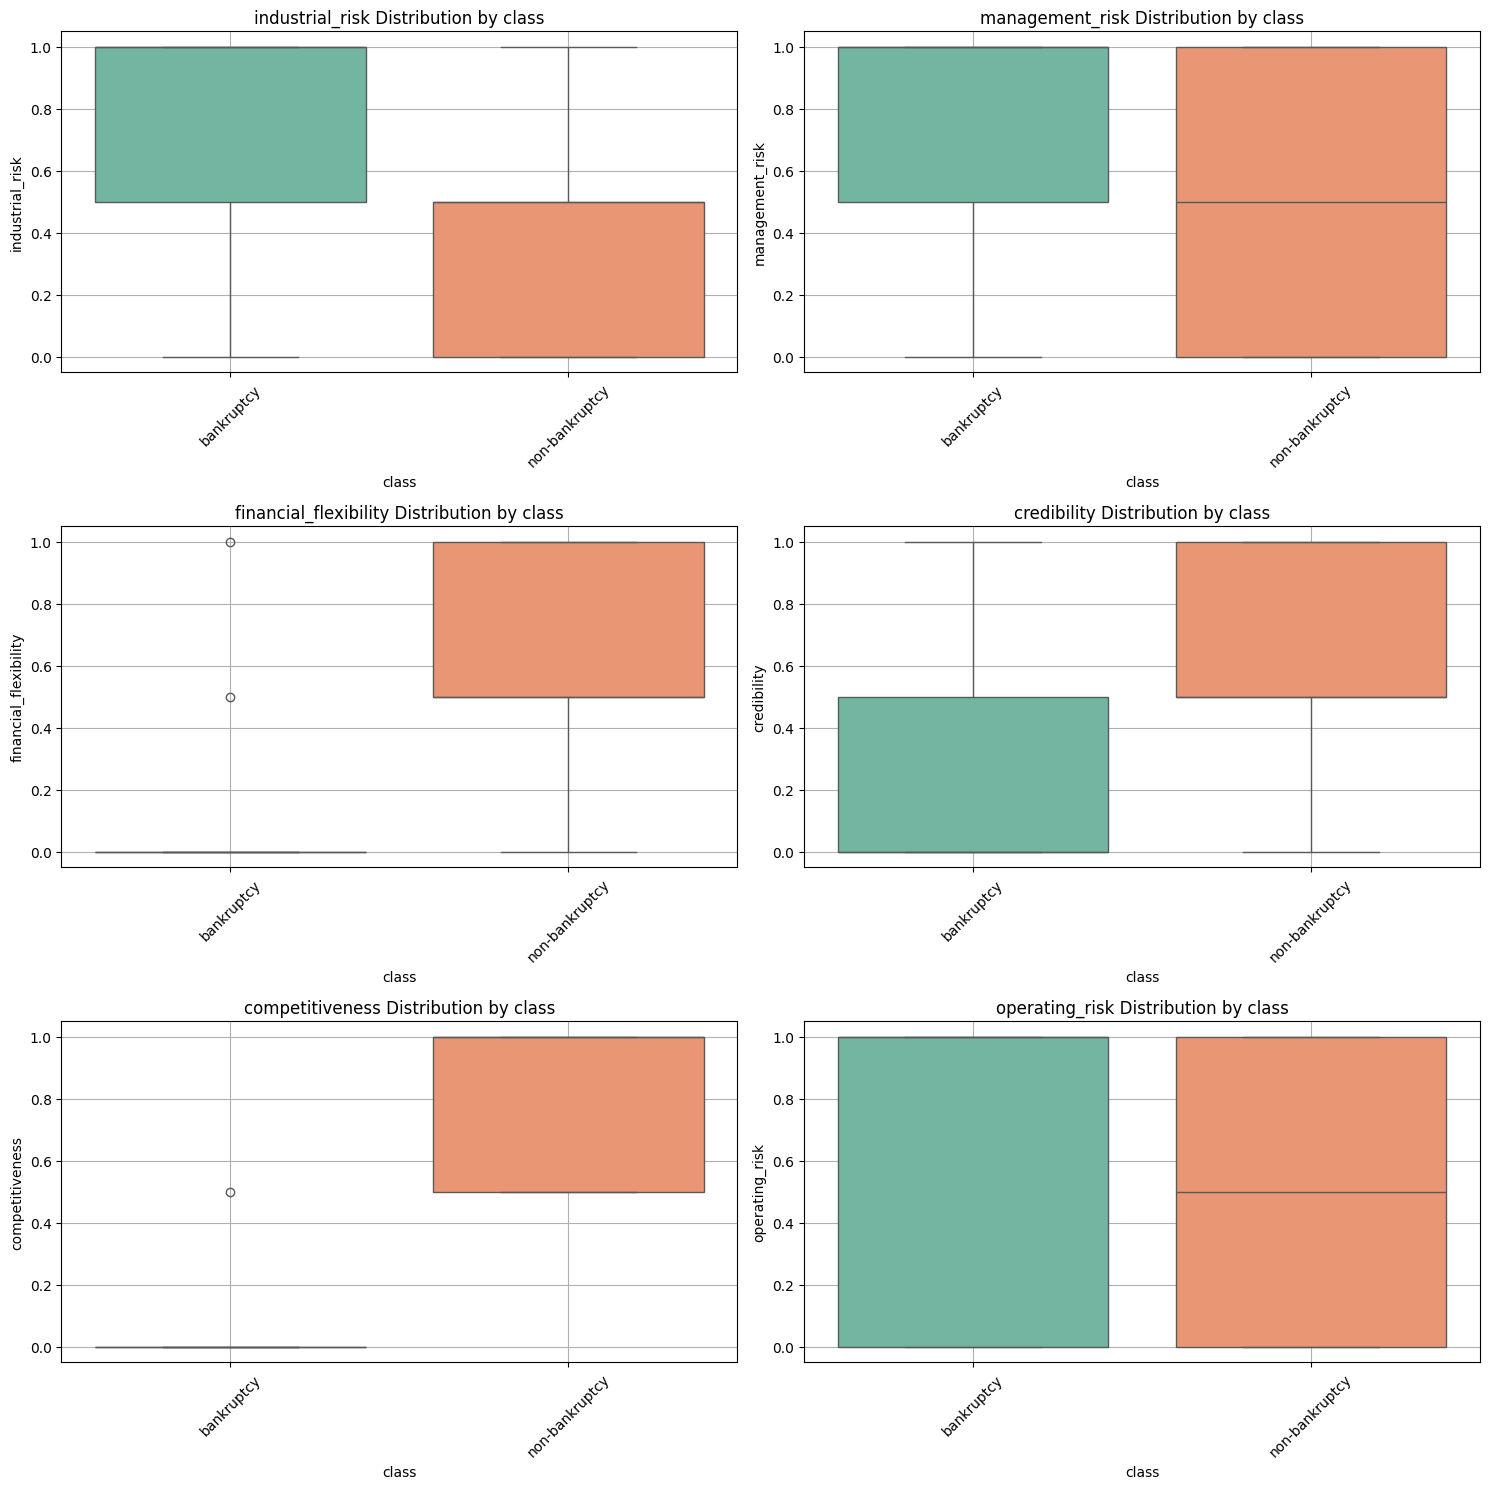

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df is already defined and loaded

# Select categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['float64']).columns

# Define a color palette
palette = sns.color_palette("Set2")

# Calculate the number of required subplots
n_cat_features = len(categorical_features)
n_num_features = len(numerical_features)

# Determine the number of rows and columns for the subplot grid
ncols = 2  # Number of columns for each categorical feature
nrows = int(np.ceil(n_num_features / ncols)) * n_cat_features

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical feature grouped by each categorical feature
plot_index = 0
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        ax = axes[plot_index]
        sns.boxplot(x=cat_feature, y=num_feature, data=df, ax=ax, palette=palette[:df[cat_feature].nunique()], hue=cat_feature, dodge=False, legend=False)
        ax.set_title(f'{num_feature} Distribution by {cat_feature}')
        ax.set_xlabel(cat_feature)
        ax.set_ylabel(num_feature)
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed
        ax.grid(True)
        plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


**Observations:**

**Risk Factors:**

Higher industrial, management, and operating risks are associated with bankruptcy, while non-bankruptcy firms manage these risks better.

**Positive Attributes:**

Financial flexibility, credibility, and competitiveness are higher in non-bankruptcy firms, indicating their stronger financial health and market position.

**Predictive Indicators:**

These categorical distributions provide clear indicators of financial health, suggesting that firms with higher flexibility, credibility, and competitiveness, coupled with lower risks, are less likely to face bankruptcy.

### Pairplot for exploring relationships between numerical features

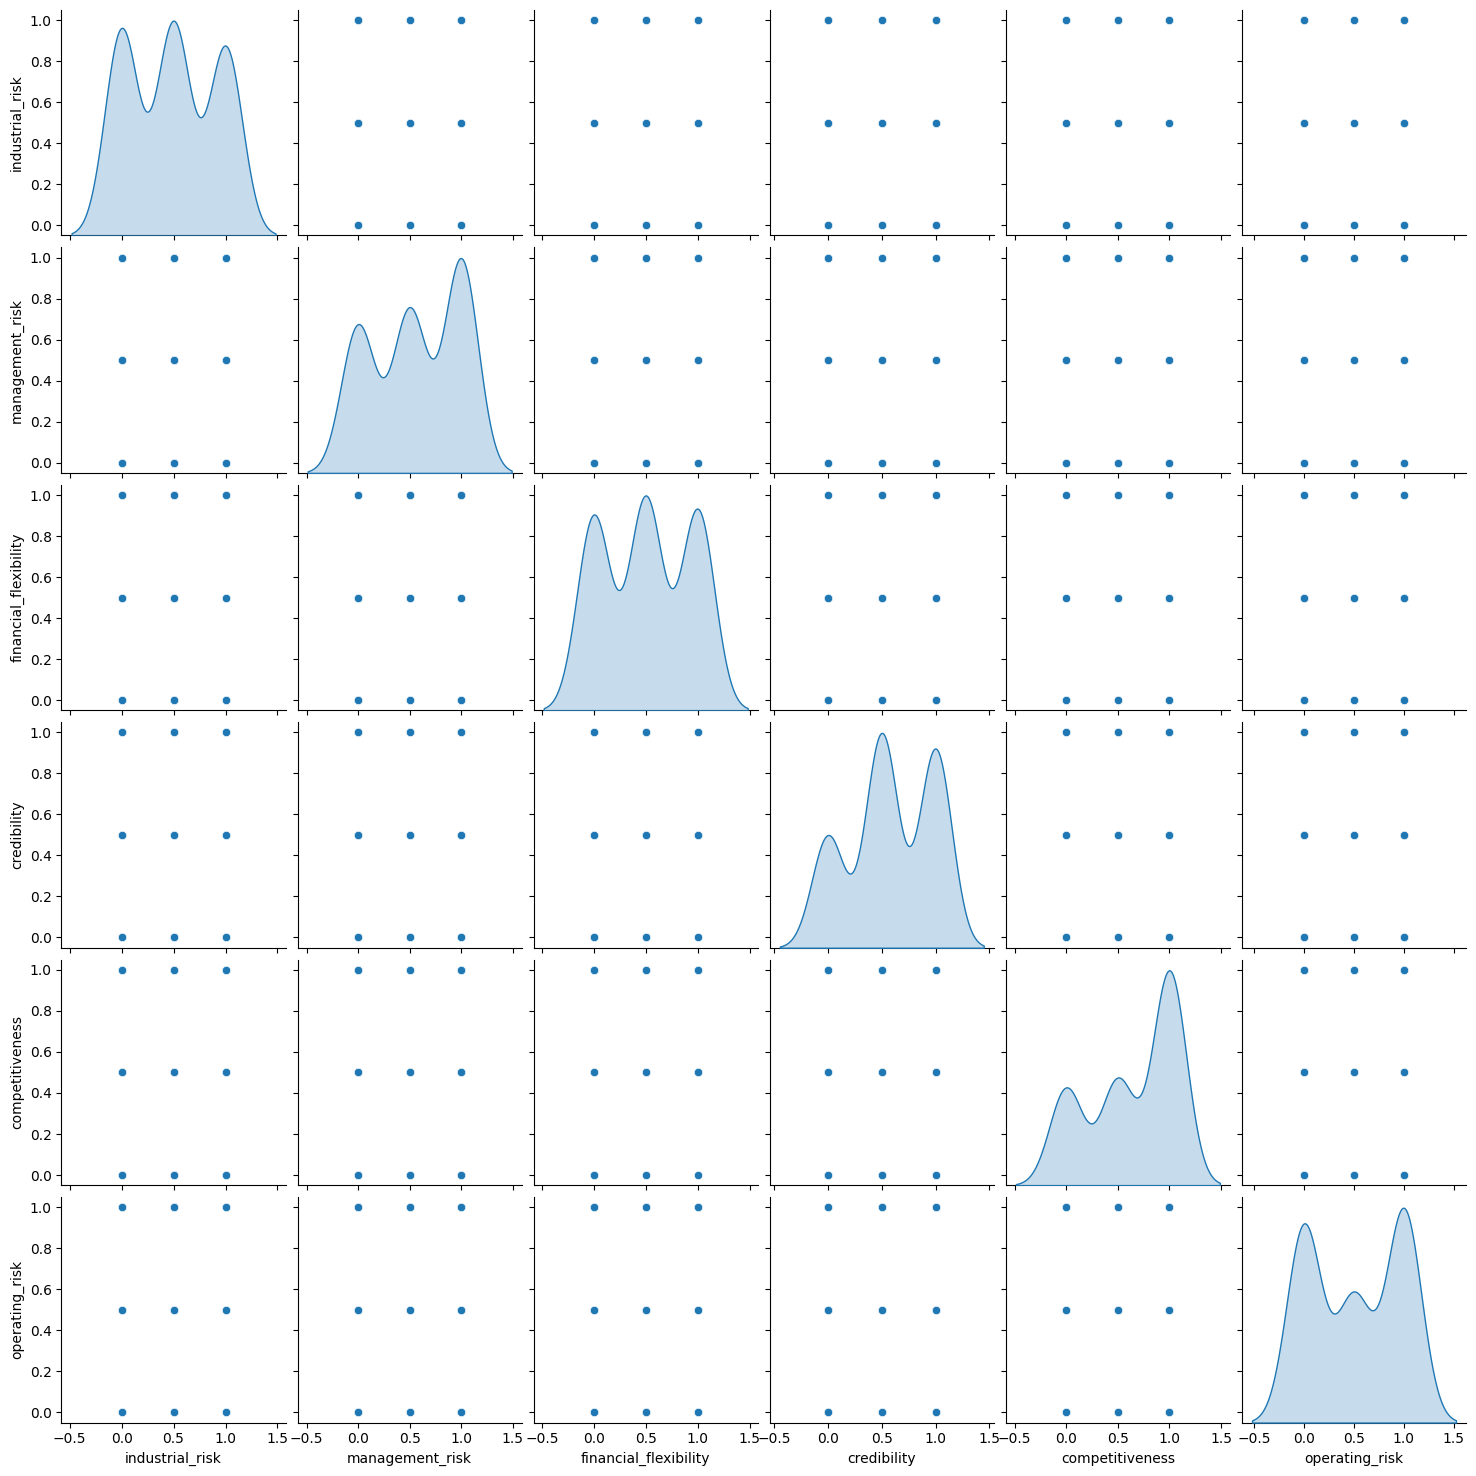

In [28]:
sns.pairplot(df, diag_kind='kde')
plt.show()

### Advanced scatter plot

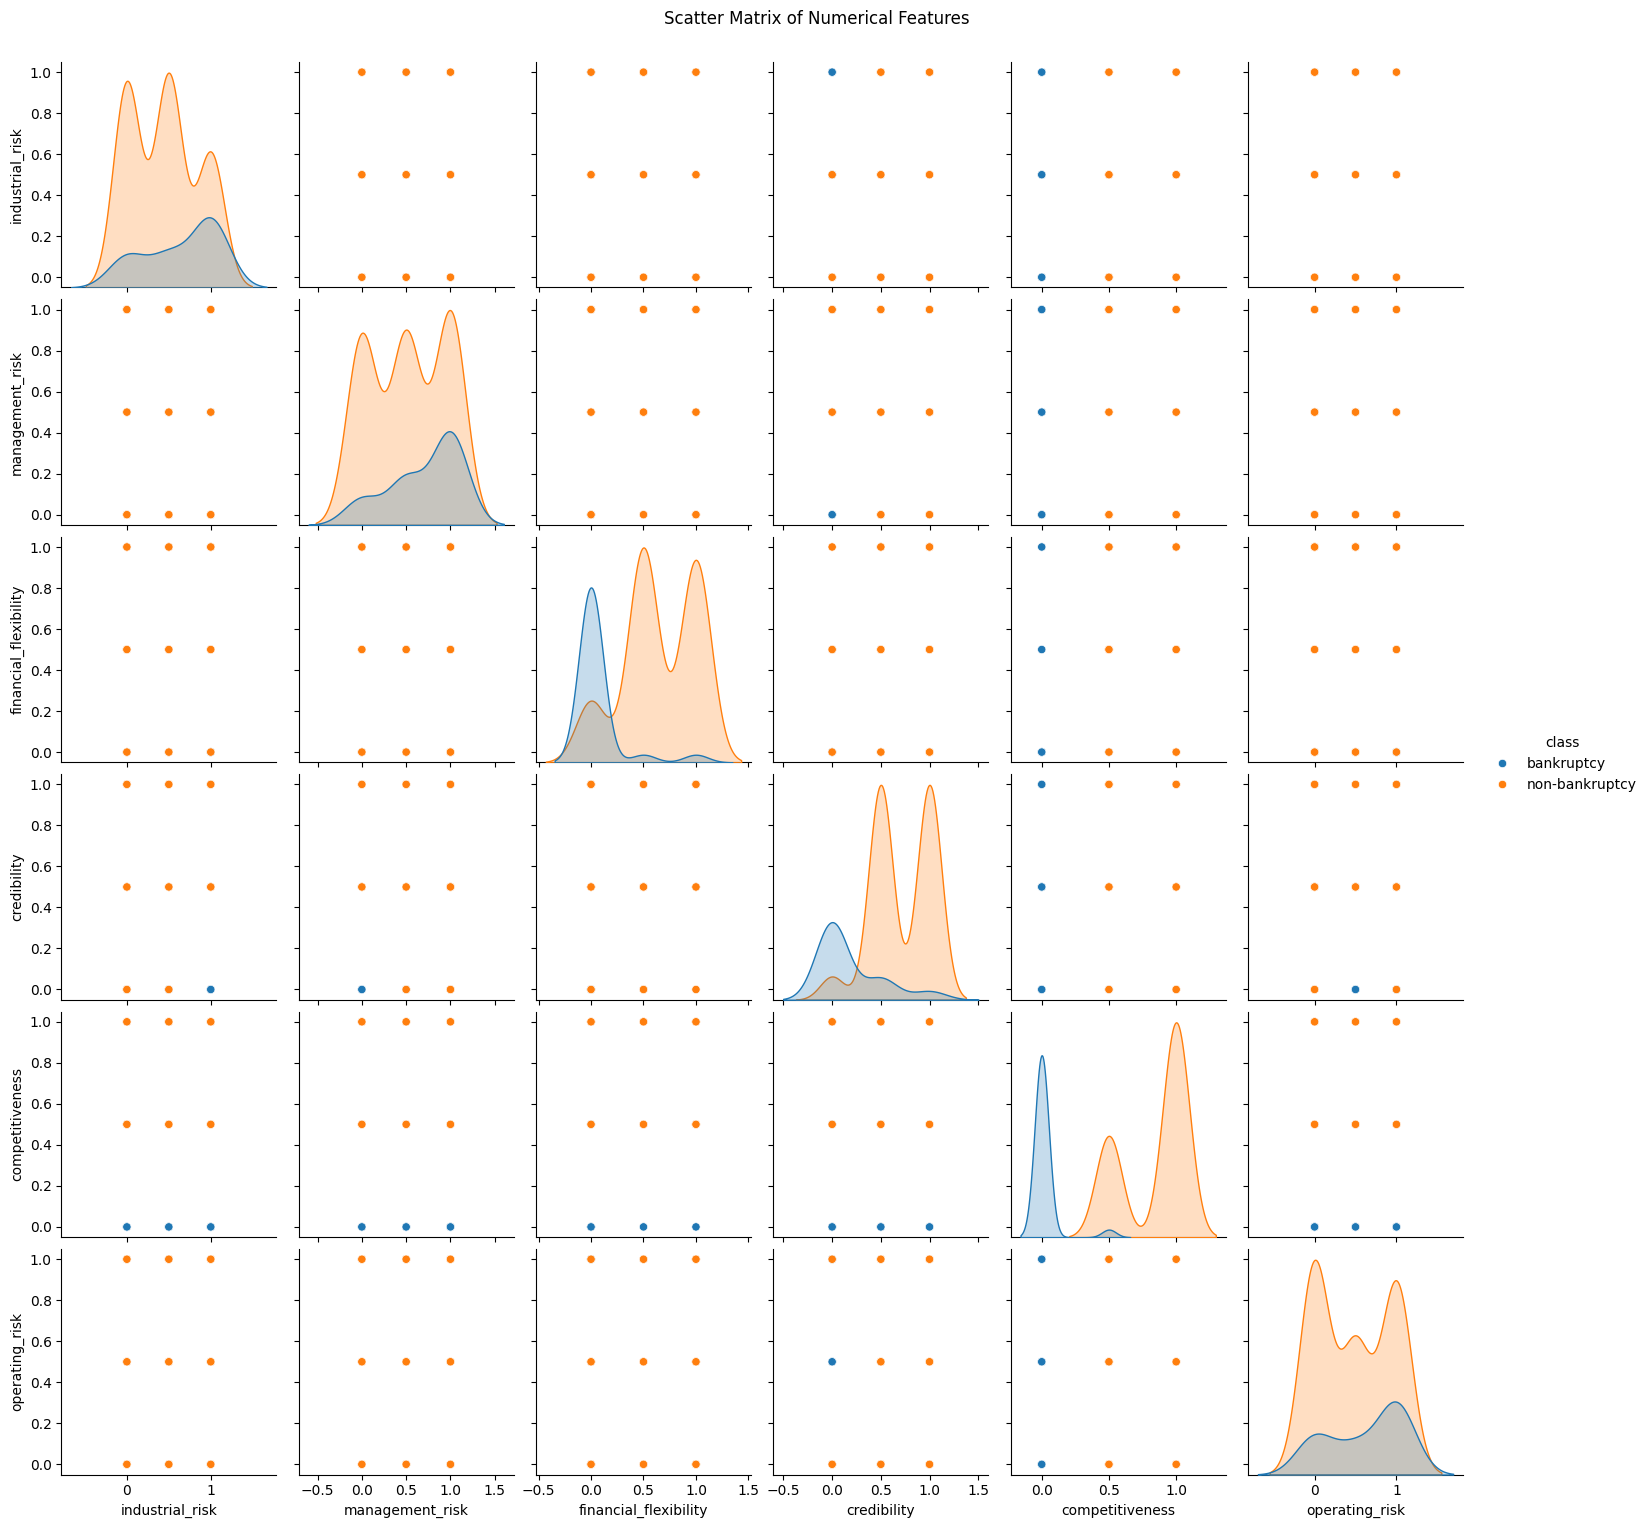

In [29]:
numerical_features = df.select_dtypes(include=['float64']).columns

# Create a pair plot of numerical features
sns.pairplot(df, vars=numerical_features, hue='class')
plt.suptitle('Scatter Matrix of Numerical Features', y=1.02)
plt.show()

### Dimensionality Reduction

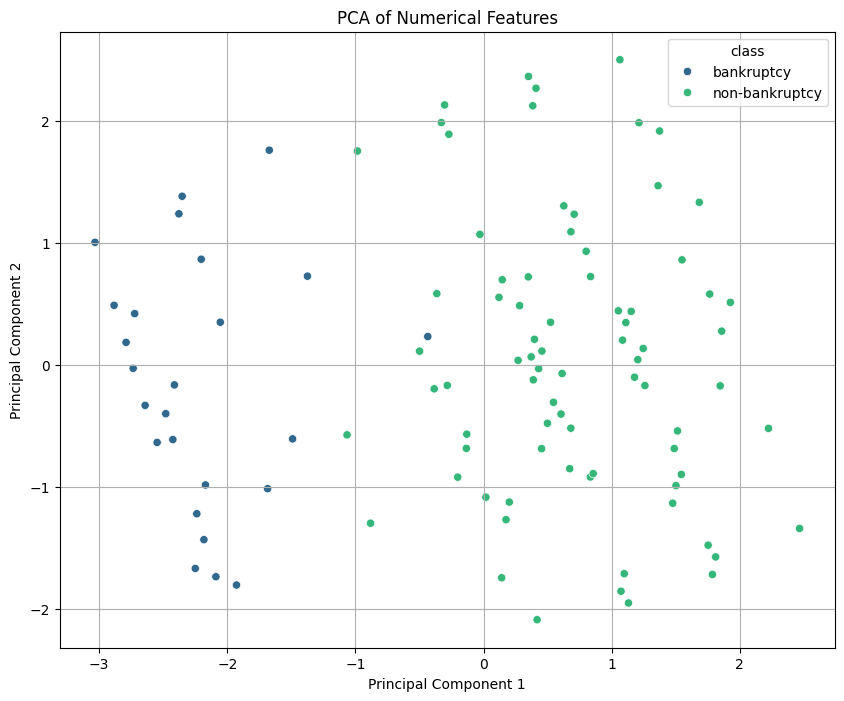

In [30]:
from sklearn.decomposition import PCA

numerical_features = df.select_dtypes(include=['float64']).columns
class_column = 'class'

# Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df[class_column] = df[class_column].values

# Plot the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=class_column, palette='viridis')
plt.title('PCA of Numerical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title=class_column, loc='best')
plt.grid(True)
plt.show()

**Observation:**

The PCA plot reveals distinct patterns in the financial features of bankrupt and non-bankrupt companies. The separation along the principal components suggests that PCA is a valuable tool for dimensionality reduction and visualization in this context. These insights can guide further analysis and potentially aid in developing predictive models for bankruptcy.

### Clustering Analysis

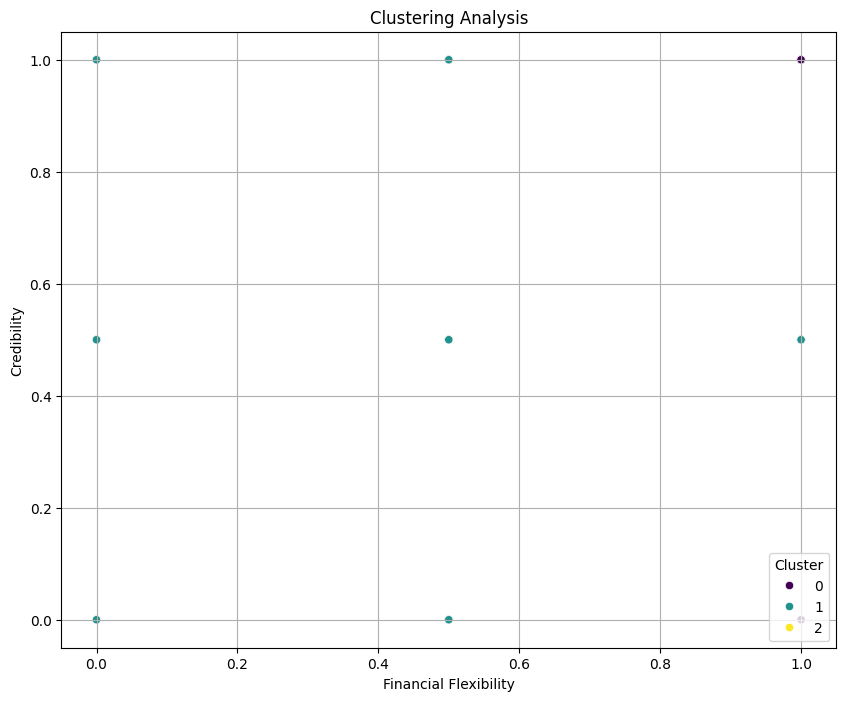

In [31]:
from sklearn.cluster import KMeans

# Select numerical features
numerical_features = df.select_dtypes(include=['float64']).columns

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numerical_features])

# Visualize the clustering result
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='financial_flexibility', y='credibility', hue='cluster', palette='viridis')
plt.title('Clustering Analysis')
plt.xlabel('Financial Flexibility')
plt.ylabel('Credibility')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# MODEL BUILDING

### Encode Target Variable

In [32]:
df['class'] = df['class'].map({'non-bankruptcy': 0, 'bankruptcy': 1})

### Split Data

In [33]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying SMOTE

In [34]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [35]:
# Check the distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 62, 1: 20})
After SMOTE: Counter({0: 62, 1: 62})


### Standardize the data:

Applying a standard scaler can be beneficial for many machine learning algorithms, especially those that rely on distance calculations (such as Logistic Regression, SVM, and Gradient Boosting).

In [36]:
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

### Model Implementation

Applying Multiple models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, SVM)

In [37]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Model Training and Evaluation

**Classification Report & ROC Curves**


Receiver Operating Characteristic (ROC) curves plot the true positive rate against the false positive rate. This helps visualize the trade-off between sensitivity and specificity for different models.

Logistic Regression:
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

AUC: 1.0

Decision Tree:
[[16  0]
 [ 1  4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

AUC: 0.9

Random Forest:
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21


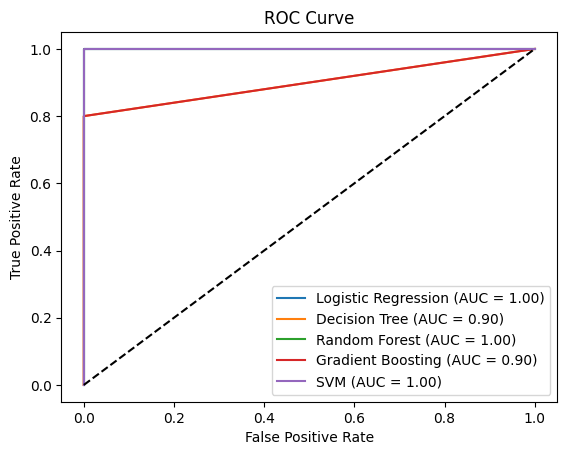

In [38]:
# Fit models, evaluate, and plot ROC curves
for name, model in models.items():
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"{name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba)}\n")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

**Observations from Classification Report:**

***Logistic Regression:***

1. Confusion Matrix: Perfect classification with all 16 non-bankruptcy and 5 bankruptcy cases correctly classified.

2. Metrics: Precision, recall, and f1-score for both classes are 1.00.

3. Accuracy: 100%.

4. AUC: 1.0, indicating perfect model performance.

***Decision Tree:***


1. Confusion Matrix: 1 misclassification for the bankruptcy class.

2. Metrics:
Non-bankruptcy: Precision and recall are 0.94 and 1.00 respectively, with an f1-score of 0.97.

3. Bankruptcy: Precision and recall are 1.00 and 0.80 respectively, with an f1-score of 0.89.

4. Accuracy: 95%.

5. AUC: 0.9, indicating very good model performance but slightly lower than the others.

***Random Forest:***

1. Confusion Matrix: Perfect classification, similar to Logistic Regression.

2. Metrics: Precision, recall, and f1-score for both classes are 1.00.

3. Accuracy: 100%.

4. AUC: 1.0, indicating perfect model performance.

***Gradient Boosting:***

1. Confusion Matrix: 1 misclassification for the bankruptcy class, similar to the Decision Tree.

2. Metrics:
Non-bankruptcy: Precision and recall are 0.94 and 1.00 respectively, with an f1-score of 0.97.

3. Bankruptcy: Precision and recall are 1.00 and 0.80 respectively, with an f1-score of 0.89.

4. Accuracy: 95%.

5. AUC: 0.9, indicating very good model performance but slightly lower than the others.

***SVM (Support Vector Machine):***

1. Confusion Matrix: Perfect classification, similar to Logistic Regression and Random Forest.

2. Metrics: Precision, recall, and f1-score for both classes are 1.00.

3. Accuracy: 100%.

4. AUC: 1.0, indicating perfect model performance.

**General Observations:**

1. Logistic Regression, Random Forest, and SVM all achieved perfect classification, with 100% accuracy and an AUC of 1.0.

2. Decision Tree and Gradient Boosting had slight misclassifications with 95% accuracy and an AUC of 0.9. Both models had a perfect precision for the bankruptcy class but slightly lower recall (0.80).

**Model Selection:**

Logistic Regression, Random Forest, and SVM are equally strong candidates due to their perfect scores. Decision Tree and Gradient Boosting, although slightly less perfect, still performed very well and could be considered depending on specific use cases or interpretability preferences.

### Bar plot to visualize key metrics such as Precision, Recall, F1-Score, and AUC.

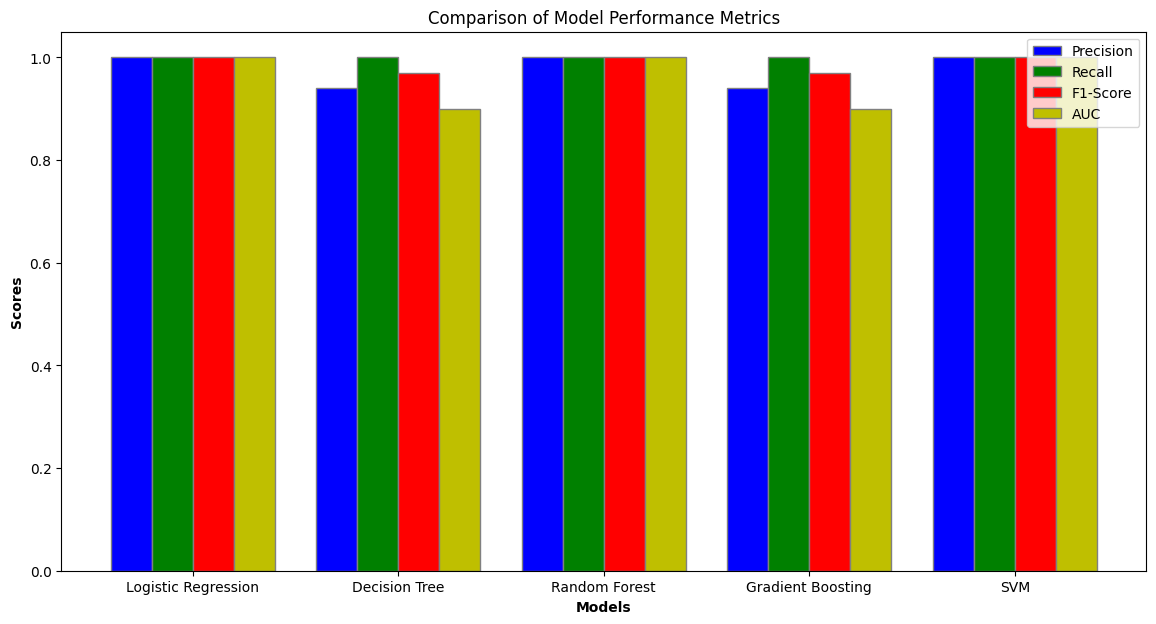

In [39]:
# Data: metrics for each model
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
precisions = [1.00, 0.94, 1.00, 0.94, 1.00]
recalls = [1.00, 1.00, 1.00, 1.00, 1.00]
f1_scores = [1.00, 0.97, 1.00, 0.97, 1.00]
aucs = [1.0, 0.90, 1.0, 0.90, 1.0]

# Set the width of the bars
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plots
plt.figure(figsize=(14, 7))

plt.bar(r1, precisions, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recalls, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='r', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, aucs, color='y', width=bar_width, edgecolor='grey', label='AUC')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(model_names))], model_names)
plt.ylabel('Scores', fontweight='bold')
plt.title('Comparison of Model Performance Metrics')

# Add legend
plt.legend()

# Display the plot
plt.show()

### **Confusion Matrices**


Confusion matrices show the counts of true positives, true negatives, false positives, and false negatives. These can be visualized as heatmaps.

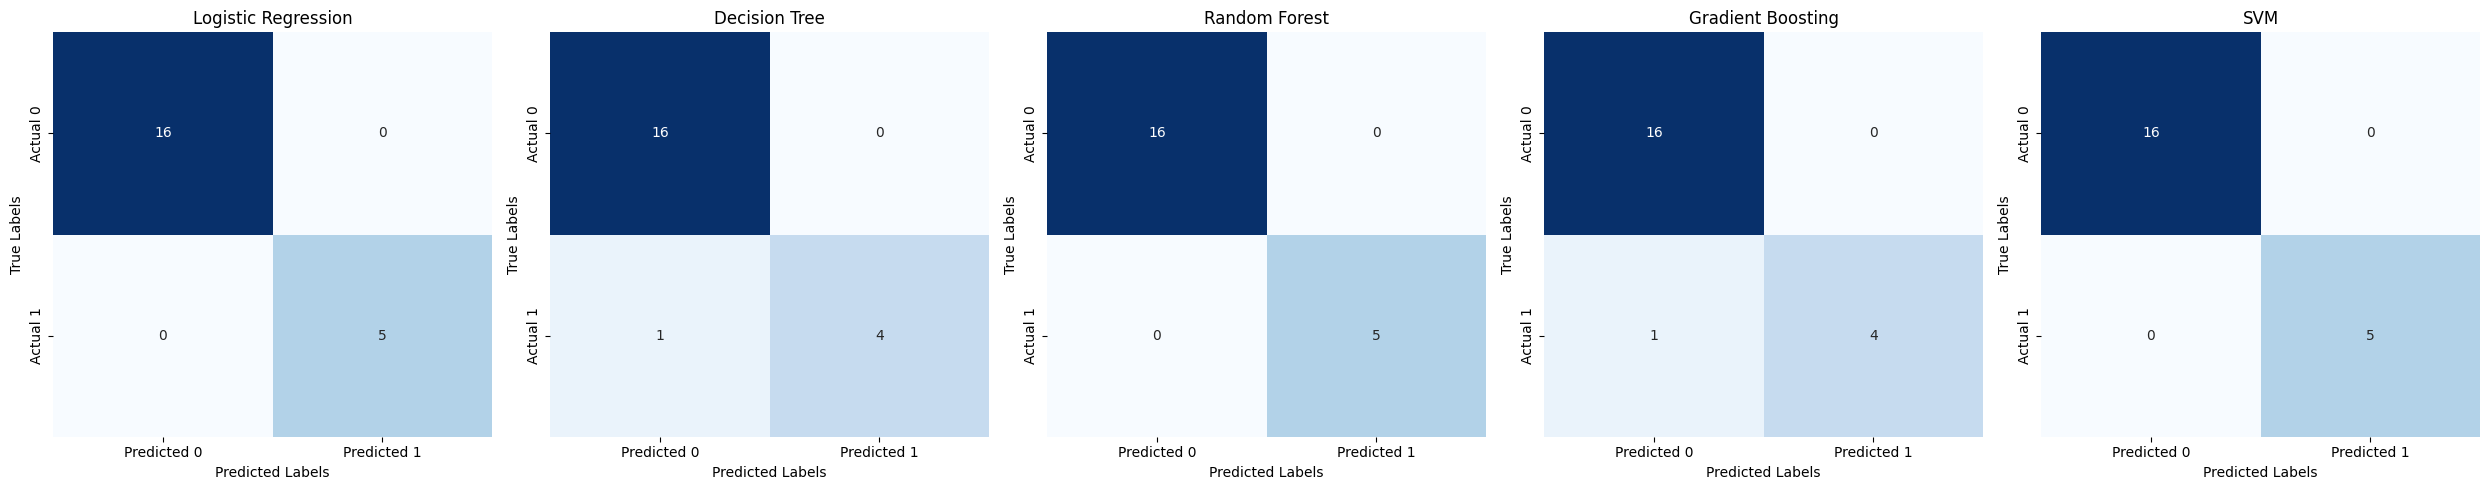

In [40]:
# Define the confusion matrices for each model
confusion_matrices = {
    'Logistic Regression': np.array([[16, 0],
                                     [ 0, 5]]),
    'Decision Tree': np.array([[16, 0],
                                [ 1, 4]]),
    'Random Forest': np.array([[16, 0],
                                [ 0, 5]]),
    'Gradient Boosting': np.array([[16, 0],
                                    [ 1, 4]]),
    'SVM': np.array([[16, 0],
                     [ 0, 5]])
}

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Plot each confusion matrix
for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    ax.set_title(model_name)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

plt.tight_layout()
plt.show()

### **Feature Importances**


For models like Decision Trees, Random Forests, and Gradient Boosting, feature importance can be plotted to understand which features are most influential.

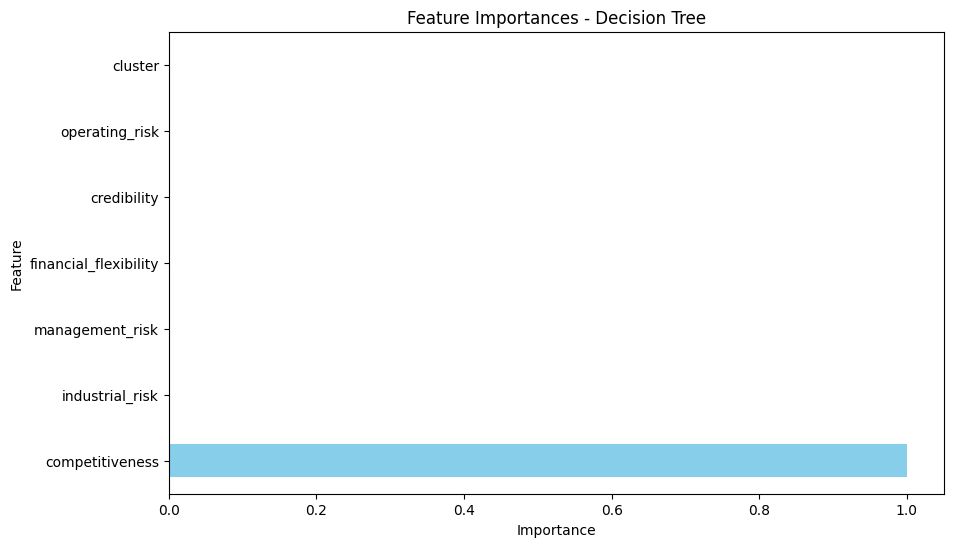

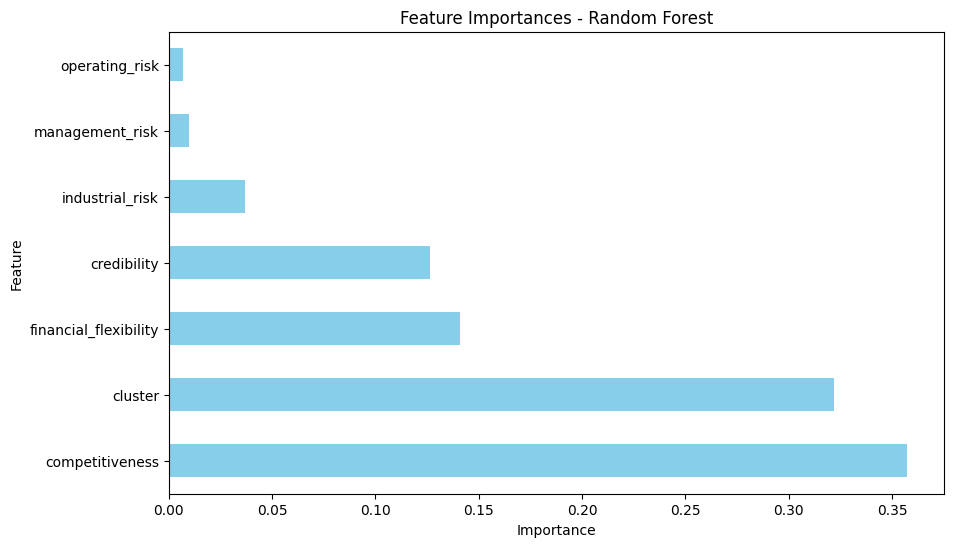

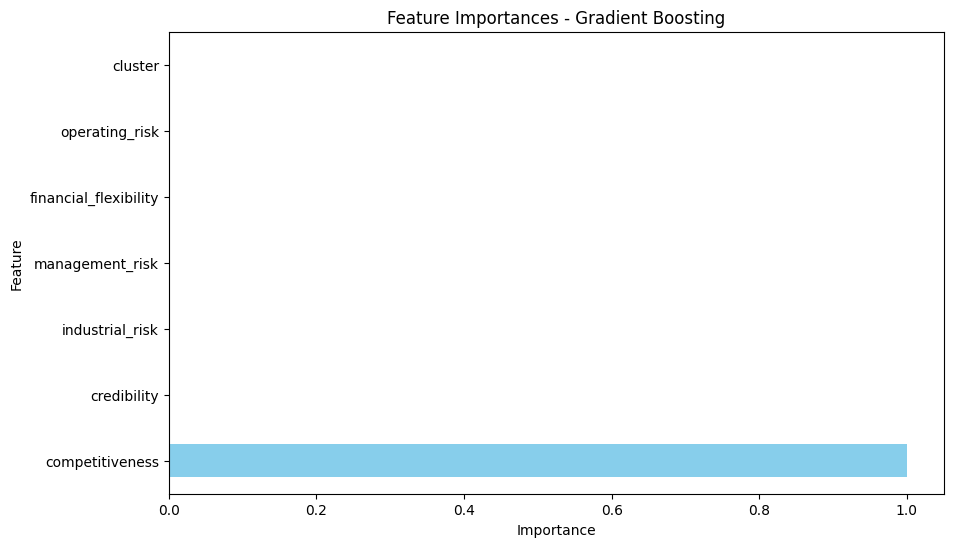

In [41]:
# Function to plot feature importance
def plot_feature_importance(model, X, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X.columns

        # Create a DataFrame for plotting
        feat_importances = pd.Series(importances, index=feature_names)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
        plt.title(title)
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"{title}: Model does not have feature_importances_ attribute.")

# Plot feature importances for Decision Tree, Random Forest, and Gradient Boosting
for name, model in models.items():
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        plot_feature_importance(model, X_train, f'Feature Importances - {name}')

### **Learning curves**

Learning curves plot training and validation scores for each epoch/iteration, helping visualize how well the model is learning over time.

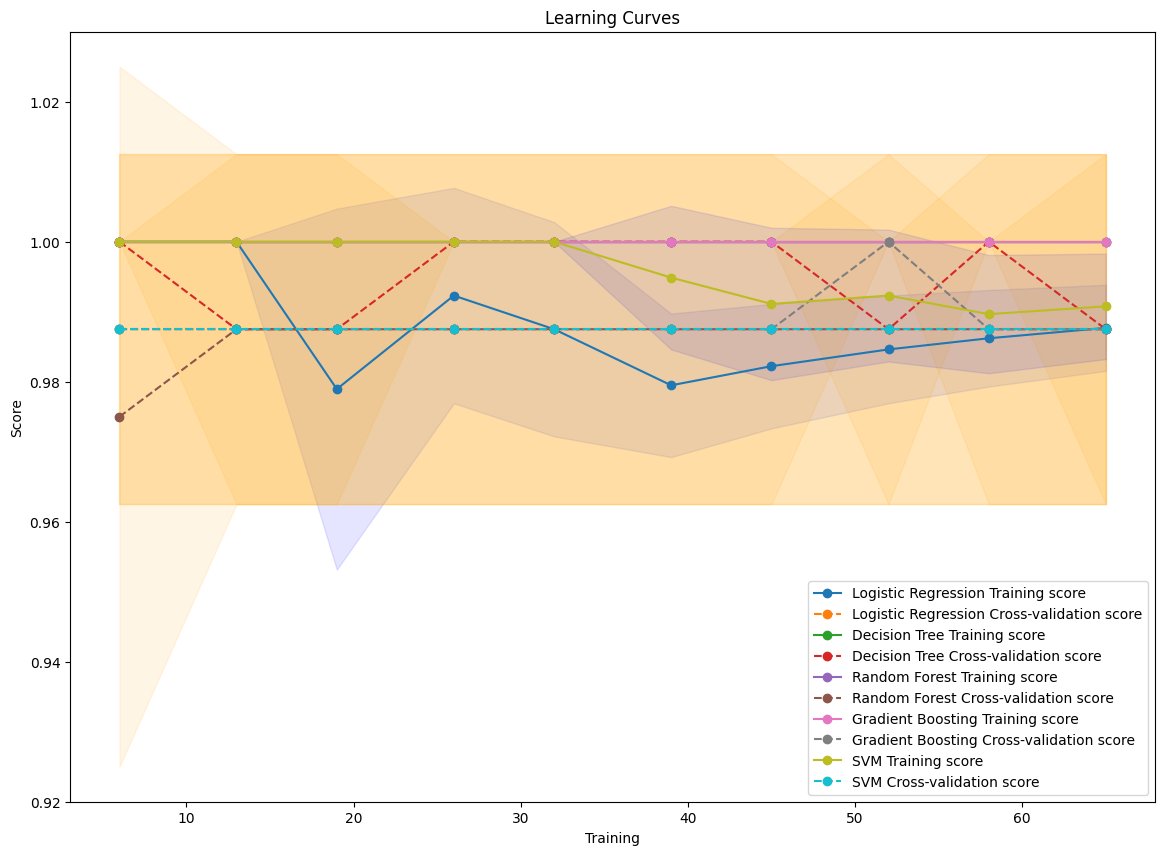

In [42]:
from sklearn.model_selection import learning_curve

# Models to plot
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Initialize plot
plt.figure(figsize=(14, 10))

# Plot learning curve for each model
for name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.plot(train_sizes, train_scores_mean, 'o-', label=f'{name} Training score')
    plt.plot(train_sizes, test_scores_mean, 'o--', label=f'{name} Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='orange')

# Add labels and title
plt.xlabel('Training')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')

# Display plot
plt.show()

# Hyperparameter Tuning & Saving the model for deployment

### Using GridSearchCV for Logistic Regression, Random Forest and SVM


If you have ample computational resources and the parameter grid is manageable, GridSearchCV ensures that you explore all possible combinations and guarantees finding the best combination within our grid.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Define parameter grids
param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Perform GridSearchCV for each model
best_estimators = {}
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")

    # Create a pipeline to include preprocessing steps
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Include scaler
        ('model', model)
    ])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1, scoring='roc_auc')
    grid_search.fit(X_train, y_train)

    # Store best estimator
    best_estimators[name] = grid_search.best_estimator_

    # Print results
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Score for {name}: {grid_search.best_score_}")

    # Evaluate on test set
    y_pred = grid_search.predict(X_test)
    y_proba = grid_search.predict_proba(X_test)[:, 1]

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba)}\n")

    # Save the best model
    model_filename = f'best_{name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(best_estimators[name], model_filename)
    print(f"Saved best {name} model to {model_filename}")

Running GridSearchCV for Logistic Regression...
Best Parameters for Logistic Regression: {'model__C': 0.01, 'model__solver': 'liblinear'}
Best Score for Logistic Regression: 1.0
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

AUC: 1.0

Saved best Logistic Regression model to best_logistic_regression_model.pkl
Running GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best Score for Random Forest: 1.0
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00    

### Using RandomizedSearchCV for Logistic Regression, Random Forest and SVM

If you want to save time and computational resources or if the parameter space is large, RandomizedSearchCV is usually more practical. It allows you to get a good approximation of the best parameters without the exhaustive search.

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Define parameter distributions
param_distributions = {
    'Logistic Regression': {
        'model__C': uniform(loc=0.01, scale=100),
        'model__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'model__n_estimators': randint(50, 500),
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 20)
    },
    'SVM': {
        'model__C': uniform(loc=0.01, scale=100),
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Perform RandomizedSearchCV for each model
best_estimators = {}
for name, model in models.items():
    print(f"Running RandomizedSearchCV for {name}...")

    # Create a pipeline to include preprocessing steps
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Include scaler
        ('model', model)
    ])

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline, param_distributions[name], n_iter=20, cv=5, n_jobs=-1,
        scoring='roc_auc', random_state=42
    )
    random_search.fit(X_train, y_train)

    # Store best estimator
    best_estimators[name] = random_search.best_estimator_

    # Print results
    print(f"Best Parameters for {name}: {random_search.best_params_}")
    print(f"Best Score for {name}: {random_search.best_score_}")

    # Evaluate on test set
    y_pred = random_search.predict(X_test)
    y_proba = random_search.predict_proba(X_test)[:, 1]

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba)}\n")

    # Save the best models
    model_filename = f'best_{name.lower().replace(" ", "_")}_randomcv_model.pkl'
    joblib.dump(best_estimators[name], model_filename)
    print(f"Saved best {name} model to {model_filename}")

Running RandomizedSearchCV for Logistic Regression...
Best Parameters for Logistic Regression: {'model__C': 37.464011884736244, 'model__solver': 'liblinear'}
Best Score for Logistic Regression: 1.0
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

AUC: 1.0

Saved best Logistic Regression model to best_logistic_regression_randomcv_model.pkl
Running RandomizedSearchCV for Random Forest...
Best Parameters for Random Forest: {'model__max_depth': 40, 'model__min_samples_leaf': 7, 'model__min_samples_split': 12, 'model__n_estimators': 137}
Best Score for Random Forest: 1.0
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
  

# **Conclusion:**

**Best Performing Models:**

Based on the results, both the Logistic Regression and Random Forest models, optimized using GridSearchCV or RandomizedSearchCV, perform equally well with an accuracy and AUC of 1.0.

**SVM Performance:**

SVM using RandomizedSearchCV shows a slightly lower accuracy of 0.95 and different precision/recall values for the two classes. This indicates that while SVM still performs well, it is not as robust as Logistic Regression or Random Forest in this specific scenario.